# Leasson 4, Activity 1: Working with adult income dataset (UCI)

In this activity, you will work with **Adult Income Dataset** from UCI Machine Learning portal. The Adult Income data set has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a Pandas DataFrame and do practice some of the advanced data wrangling you learned in this Lesson.

### URL for downloading the data
We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data download on your own so that you are familiar with the process.

**Here is the URL for the data set**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

**Here is the URL for the description of the data set and the variables (at the end of the document)**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

### Attributes/Variables

Following are the details of the type of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity. Note that, many of the attributes are of discrete factor type. These are common type for a classification problem unlike continuous numeric values used for regression problems.

* __age__: continuous.
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt__: continuous.
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__: continuous.
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex__: Female, Male.
* __capital-gain__: continuous.
* __capital-loss__: continuous.
* __hours-per-week__: continuous.
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### A special note on the variable 'fnlwgt':

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls. These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Load necessary libraries

In [17]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt

### Read in the adult income data set (given as a .csv file) from the local directory and check first 5 records

In [2]:
# Write your code here
df = pd.read_csv("adult_income_data.csv")
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


### Do you think the column names (headers) make sense?

# Write your answer here
## No, the header or the column names do not make sense as is present in the file.

### Time to read in the text file with data descriptions and extract header names
Write a file reading script which reads the text file line by line, and extracts the first phrase which is the header name

In [4]:
# reading the whole file in a dataframe to see some details
df1 = pd.read_csv('adult_income_names.txt', sep=':',header=None)
df1

,0,1
0,age,continuous.
1,workclass,"Private, Self-emp-not-inc, Self-emp-inc, Fede..."
2,fnlwgt,continuous.
3,education,"Bachelors, Some-college, 11th, HS-grad, Prof-..."
4,education-num,continuous.
5,marital-status,"Married-civ-spouse, Divorced, Never-married, ..."
6,occupation,"Tech-support, Craft-repair, Other-service, Sa..."
7,relationship,"Wife, Own-child, Husband, Not-in-family, Othe..."
8,sex,"Female, Male."
9,capital-gain,continuous.


In [5]:
# Write your code here
# Defining an empty list to hold the column names
col_nme = []
# opening the file to read line by line
with open('adult_income_names.txt', 'r') as f:
    for line in f:  # reading each line from the file in a loop
        f.readline() 
        header = line.split(":")[0]  # As per the text file the first column has the header name
        col_nme.append(header)
col_nme

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

### Add a name ("_Income_") for the response variable (last column) to the dataset and read it again with the column names supplied 

In [6]:
# Write your code here
## Adding a new item to the list of column names
col_nme.append('Income')

In [8]:
# Write your code here
# Reading the data file again with the new list of column names added
df = pd.read_csv('adult_income_data.csv', names=col_nme)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


### Show a statistical summary of the data set. Did you notice only a small number of columns are included?

In [9]:
# The below command shows the data types of the columns in the data frame

df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [10]:
# Write your code here
# This could be done with describe command on the pandas dataframe
# The Statistical analysis is only applied to the int64 datatype columns so lesser number of columns
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Many variables in the dataset have multiple factors or classes. Can you write a loop to count and print them?

In [11]:
# Write your code here
# Taking all the non integer columns as factor class into a list
fac_class =['workclass','education','marital-status','occupation','relationship','sex','native-country','Income']

In [12]:
# Write your code here
# looping through the list now and counting the number of values for each column
# Using the unique function to get the distinct values of the factor classes
# Using the nunique to count of unique values of the factors
for x in fac_class:
    values = df[x].unique()
    num_of_values = df[x].nunique()
    print('There are {} classes in the \"{}\" column. They are: {}'.format(num_of_values,x,values))
    print('-'*100)

There are 9 classes in the "workclass" column. They are: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------------------------------------------------------------------
There are 16 classes in the "education" column. They are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------------------------------------------------------------------
There are 7 classes in the "marital-status" column. They are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
----------------------------------------------------------------------------------------------------
There are 15 classes in the "occupation" column. They are: [' Adm-clerical' ' Exec

### Is there any missing (NULL) data in the dataset? Write a single line of code to show this for all coumns

In [13]:
# Write your code here
# Summing over the binary output of the isnull function
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

### Practice subsetting: Create a DataFrame with only 
* age, 
* education,
* occupation
* race

In [14]:
# Write your code here
# Subsetting the dataframe for only 4 columns but as race is not part of the dataframe using native-country instead
df_subset = df[['age','education','occupation','native-country']]
# Showing the first 5 rows of the subset dataframe
df_subset.head()

,age,education,occupation,native-country
0,39,Bachelors,Adm-clerical,United-States
1,50,Bachelors,Exec-managerial,United-States
2,38,HS-grad,Handlers-cleaners,United-States
3,53,11th,Handlers-cleaners,United-States
4,28,Bachelors,Prof-specialty,Cuba


### Show the histogram of age with bin size = 20

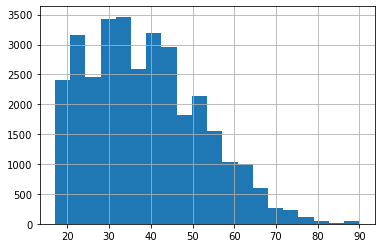

In [15]:
# Write your code here
df_subset['age'].hist(bins=20);

### Show boxplots of _age_ grouped by _race_ (Use a long figure size 15x6 and make _x_ ticks font size 15 )

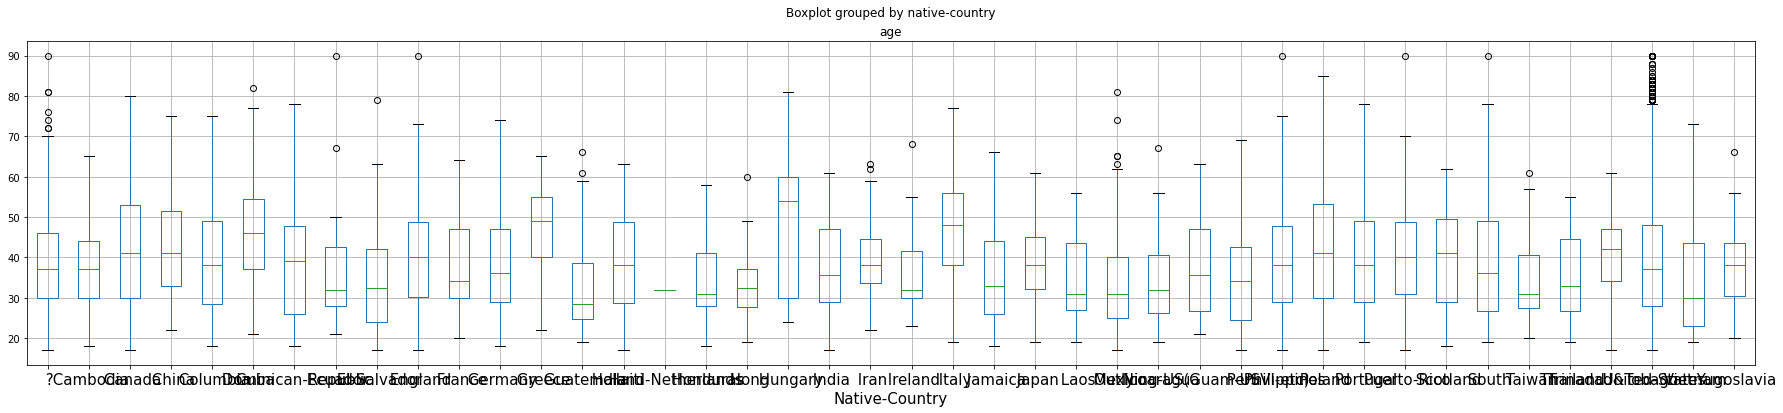

In [22]:
# Write your code here
df_subset.boxplot(column='age', by='native-country', figsize=(30,6))
plt.xticks(fontsize=15)
plt.xlabel("Native-Country", fontsize=15)
plt.show()

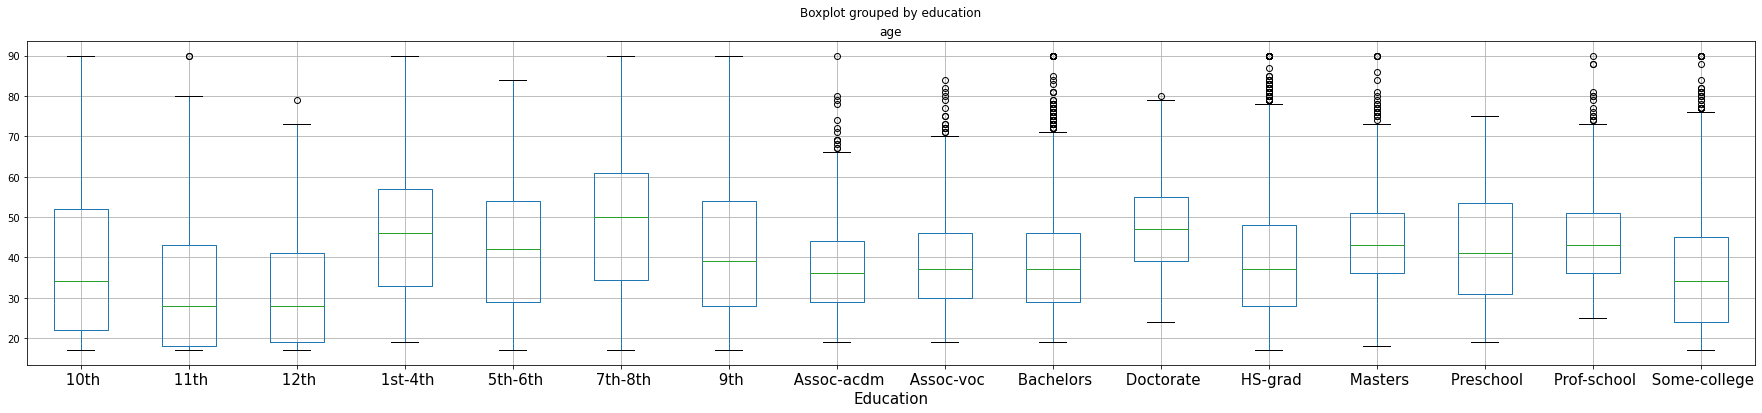

In [21]:
# Write your code here
# using the age with the education for the boxplot
df_subset.boxplot(column='age', by='education', figsize=(30,6))
plt.xticks(fontsize=15)
plt.xlabel("Education", fontsize=15)
plt.show()

### Before doing further operation, we need to use the skill with 'apply' method we learned in this lesson. <br><br> But why? - Turns out that during reading the dataset from the CSV file, all the strings came with a whitespace character in front. So, we need to remove that whitespace from all the strings. 

### Let's write a small function to strip the whitespace character

In [29]:
# Write your function here
def strip_whitespace(s):
    return s.strip()

### Use the 'apply' method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

#### This is the preferred method so that you don't accidentally delete valuable data. Most of the time, create a new column with a desired operation and then copy it back to the old column if necessary.

#### IGNORE any warning messages printed.

In [78]:
# Verifying the dataframes before replacing columns
# original dataframe shape
df.shape

(32561, 14)

In [79]:
#Shape of the subset dataframe
df_subset.shape

(32561, 4)

In [80]:
# Education column
# Write your code here
# Adding the new column with stripped white spaces
df_subset['education_stripped'] = df['education'].apply(strip_whitespace)

# copy the data from the stripped column to the actual column
df_subset['education'] = df_subset['education_stripped']

# now dropping the added column for the stripped data
df_subset.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column
# Write your code here
# Adding the new column with stripped white spaces
df_subset['occupation_stripped'] = df['occupation'].apply(strip_whitespace)

# copy the data from the stripped column to the actual column
df_subset['occupation'] = df_subset['occupation_stripped']

# now dropping the added column for the stripped data
df_subset.drop(labels=['occupation_stripped'],axis=1,inplace=True)

df_subset.head

<ipython-input-80-2880caeec631>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education_stripped'] = df['education'].apply(strip_whitespace)
<ipython-input-80-2880caeec631>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education'] = df_subset['education_stripped']
/home/samantoz/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

<bound method NDFrame.head of        age   education         occupation  native-country
0       39   Bachelors       Adm-clerical   United-States
1       50   Bachelors    Exec-managerial   United-States
2       38     HS-grad  Handlers-cleaners   United-States
3       53        11th  Handlers-cleaners   United-States
4       28   Bachelors     Prof-specialty            Cuba
...    ...         ...                ...             ...
32556   27  Assoc-acdm       Tech-support   United-States
32557   40     HS-grad  Machine-op-inspct   United-States
32558   58     HS-grad       Adm-clerical   United-States
32559   22     HS-grad       Adm-clerical   United-States
32560   52     HS-grad    Exec-managerial   United-States

[32561 rows x 4 columns]>

### Answer the following question using conditional filtering/boolean indexing: <br><br> _"How many black people of age between 30 and 50 (inclusive) are represented in this dataset?"_

In [106]:
# Write a code with conditional clauses and join them by & (AND) to filter the dataframe
# Write your code here
# As there is no race in the dataframe so using filtering only by age
# Additional filter is on the occupation

df_filtered=df_subset[(df_subset['age']>=30) & (df_subset['age']<=50) & (df_subset['occupation']=='Exec-managerial')]
df_filtered.head()

,age,education,occupation,native-country
1,50,Bachelors,Exec-managerial,United-States
5,37,Masters,Exec-managerial,United-States
9,42,Bachelors,Exec-managerial,United-States
10,37,Some-college,Exec-managerial,United-States
19,43,Masters,Exec-managerial,United-States


In [110]:
# We can look at the shape of the filtered dataframe and take the 1st element at 0 index of the tuple
# Write your code here
exec = df_filtered.shape[0]

In [111]:
# Print out the number of black people between 30 and 50
# Write your code here
# The below print shows the number of executive managers
print("There are {} Executive Managers of age between 30 and 50 in this dataset.".format(exec))

There are 2479 Executive Managers of age between 30 and 50 in this dataset.


### Practice "GroupBy": Group by race and education to show how the mean age is distributed

In [113]:
# Write your code here
# The below query is grouped by the occupation instead of the race 
df_subset.groupby(['occupation']).mean()['age']

occupation
?                    40.882800
Adm-clerical         36.964456
Armed-Forces         30.222222
Craft-repair         39.031471
Exec-managerial      42.169208
Farming-fishing      41.211268
Handlers-cleaners    32.165693
Machine-op-inspct    37.715285
Other-service        34.949621
Priv-house-serv      41.724832
Prof-specialty       40.517633
Protective-serv      38.953775
Sales                37.353973
Tech-support         37.022629
Transport-moving     40.197871
Name: age, dtype: float64

### Group by occupation and show the summary statistics of age. Try to answer the following questions,
* Which profession has oldest workers on the average?
* Which profession has its largest share of workforce above 75th percentile?

In [116]:
# Write your code here to answer the questions above
# In order to get the above questions answeed we can use the describe function
df2 = df_subset.groupby(['occupation']).describe()['age']
df2

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [132]:
# In oreder to answer the questions
# Which profession has oldest workers on the average?
# Here I am trying to subset the data frame for getting the maximum of the mean age
# df2.max()['mean']
df3 = df2[df2['mean'] == df2.max()['mean']]
df3

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0


In [135]:
# Which profession has its largest share of workforce above 75th percentile?
# df2.max()['count']
df4 = df2[df2['count'] == df2.max()['count']]
df4

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Prof-specialty,4140.0,40.517633,12.016676,17.0,31.0,40.0,48.0,90.0


### Detecting outlier: Is there a particular occupation group which has very low representation? Perhaps we should remove those data because with very low data the group won't be useful in analysis

Actually, just by looking at the table above, you should be able to see that **'Armed-Forces'** group has only 9 count i.e. 9 data points. But how to detect it. Plot the count column in a bar chart.

Note, how the first argument to the barh function is the index of the dataframe which is the summary stats of the occupation groups. We see that 'Armed-Forces' group has almost no data.

#### This exercise teaches you that sometimes, outlier is not just a value but can be a whole group. The data of this group is fine but it is too small to be useful for any analysis. So it can be treated as an outlier in this case. 

#### But always use your business knowledge and engineering judgement for such outlier detection and how to process them.

In [ ]:
# Write your code here
# df2 is the new dataframe with the dataset showing the data
df2

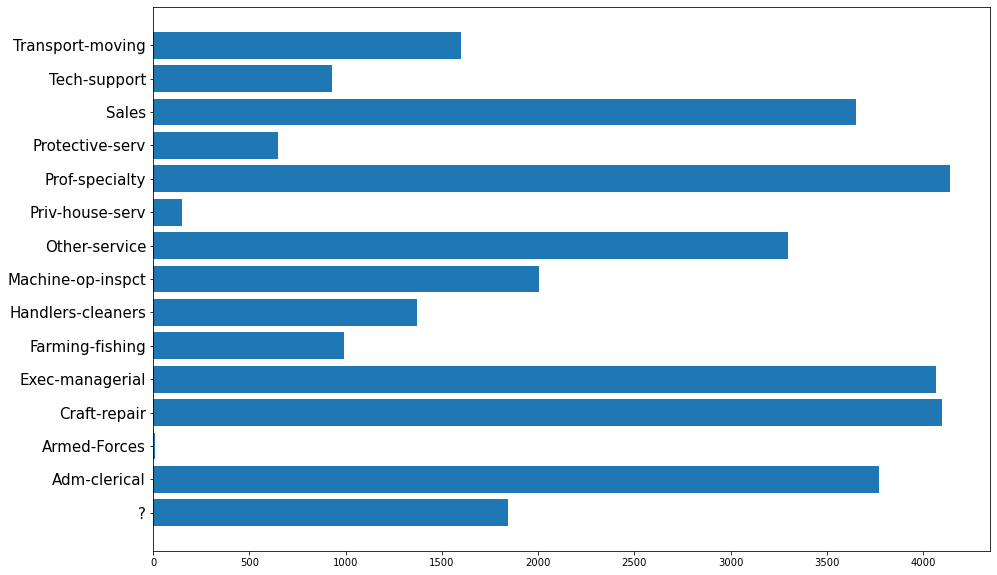

In [141]:
# Create a horizontal bar chart
# Write your code here
# The below horizontal bar chart shows that the occupation group 'Armed Forces' has the least representation and hence is the outlier here.
plt.figure(figsize=(15,10))
plt.barh(y = df2.index,
        width = df2['count'])
plt.yticks(fontsize=15)
plt.show();

### Practice Merging by common keys: Suppose you are given two datasets where the common key is `occupation`. Can you merge them? 

#### First create two such disjoint datasets by taking random samples from the full dataset and then try merging. Include at least 2 other columns along with the common key column for each dataset.

#### Notice how the resulting dataset, after merging, may have more data points than either of the two starting datasets if your common key is not unique? Why is it so?

In [154]:
# Sample first dataframe with 5 elements and your chosen random_state
# Write your code here
df_first = df[['age','workclass','occupation']].sample(5,random_state=250)

In [155]:
df_first.head()

,age,workclass,occupation
25499,27,Local-gov,Transport-moving
12083,56,Private,Craft-repair
8875,36,Private,Sales
28251,41,Self-emp-inc,Exec-managerial
24457,39,Private,Machine-op-inspct


In [156]:
# Sample second dataframe with 5 elements and your chosen random_state
# Write your code here
df_second = df[['education','occupation']].sample(5,random_state=250)

In [157]:
df_second.head()

,education,occupation
25499,HS-grad,Transport-moving
12083,HS-grad,Craft-repair
8875,Some-college,Sales
28251,HS-grad,Exec-managerial
24457,Bachelors,Machine-op-inspct


In [158]:
# Merge the dataframes
# Write your code here
df_merged = pd.merge(df_first,df_second,on='occupation',how='inner')

In [160]:
# Show the merged dataframe
df_merged

,age,workclass,occupation,education
0,27,Local-gov,Transport-moving,HS-grad
1,56,Private,Craft-repair,HS-grad
2,36,Private,Sales,Some-college
3,41,Self-emp-inc,Exec-managerial,HS-grad
4,39,Private,Machine-op-inspct,Bachelors
